In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Pre-Process

In [4]:
df = pd.read_csv("coupon_transformed.csv")
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df.head()

,gender,expiration,age,time,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,coupon,maritalStatus,occupation,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1.0,24.0,21.0,14.0,3.0,0.0,0.0,2.0,3.0,2.0,...,0.706703,0.596264,0.604784,55.0,1.0,0.0,0.0,0.0,1.0,1
1,1.0,2.0,21.0,10.0,3.0,0.0,0.0,2.0,3.0,2.0,...,0.509418,0.596951,0.588087,80.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,2.0,21.0,10.0,3.0,0.0,0.0,2.0,3.0,2.0,...,0.750131,0.606632,0.527003,80.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,2.0,21.0,14.0,3.0,0.0,0.0,2.0,3.0,2.0,...,0.548418,0.522019,0.550260,80.0,1.0,1.0,0.0,0.0,1.0,0
4,1.0,24.0,21.0,14.0,3.0,0.0,0.0,2.0,3.0,2.0,...,0.490096,0.503479,0.520709,80.0,1.0,1.0,0.0,0.0,1.0,0


In [6]:
#Bring response variable "Y" to index=0
df_columns = df.columns.tolist()
new_columns = ["Y"]
df_columns.remove("Y")
new_columns = new_columns + df_columns

In [7]:
df = df.reindex(columns = new_columns)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
#Scale features for K-means clustering
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [10]:
#Keep column names in scaled dataset
df_scaled.columns = df.columns

In [11]:
df_scaled.head()

,Y,gender,expiration,age,time,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,...,weather,coupon,maritalStatus,occupation,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,0.871334,0.973698,0.888114,-1.088542,0.033233,-0.89103,-0.950925,-1.269355,-0.449373,0.779695,...,0.659139,0.966234,0.430948,0.485069,-0.433430,1.189378,-1.131581,-0.367745,-0.522967,0.522967
1,-1.147665,0.973698,-1.125982,-1.088542,-0.706285,-0.89103,-0.950925,-1.269355,-0.449373,0.779695,...,-0.697153,-0.417349,0.441608,0.259699,0.871799,1.189378,-1.131581,-0.367745,-0.522967,0.522967
2,0.871334,0.973698,-1.125982,-1.088542,-0.706285,-0.89103,-0.950925,-1.269355,-0.449373,0.779695,...,0.963963,1.270806,0.591674,-0.564755,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
3,-1.147665,0.973698,-1.125982,-1.088542,0.033233,-0.89103,-0.950925,-1.269355,-0.449373,0.779695,...,-0.151848,-0.143842,-0.719961,-0.250845,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967
4,-1.147665,0.973698,0.888114,-1.088542,0.033233,-0.89103,-0.950925,-1.269355,-0.449373,0.779695,...,0.979251,-0.552857,-1.007356,-0.649704,0.871799,1.189378,0.883720,-0.367745,-0.522967,0.522967


# Clustering: K-means

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [13]:
#Define lists to keep track of scores in order to compare k value
withinss = []
silh_score = []
pseudof_score = []

In [14]:
#For loop to try different variables for k - numbers of clusters
for k in range(2,50):
    kmeans = KMeans(n_clusters = k, max_iter = 2500, n_init=100)
    
    cluster_model = kmeans.fit(df_scaled)
    
    withinss.append(cluster_model.inertia_)
    silh_score.append(silhouette_score(df_scaled, cluster_model.labels_))
    pseudof_score.append(calinski_harabasz_score(df_scaled, cluster_model.labels_))

In [15]:
#Put cluster outputs into a dataframe
df_cluster_kmeans = pd.DataFrame(
    columns = ['inertia','silhouette_score','pseudof_score','k_clusters'])
df_cluster_kmeans['inertia'] = withinss
df_cluster_kmeans['silhouette_score'] = silh_score
df_cluster_kmeans['pseudof_score'] = pseudof_score
df_cluster_kmeans['k_clusters'] = list(range(2,50))

## Plotting results

Text(0.5, 1.0, 'Inertia (Red) and Silhouette Score (Blue)')

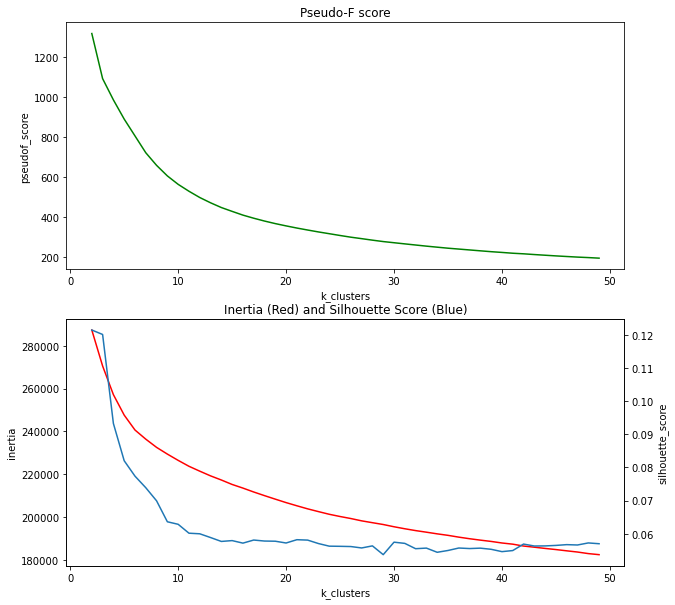

In [16]:
fig, ((ax1, ax3)) = plt.subplots(2, 1, figsize=(10,10))

#Plot for pseudof score
sns.lineplot(y = df_cluster_kmeans['pseudof_score'], x = df_cluster_kmeans['k_clusters'], ax=ax1, color='g')
ax1.set_title('Pseudo-F score')

#Plot for inertia and silhouette score
sns.lineplot(y = df_cluster_kmeans['inertia'], x = df_cluster_kmeans['k_clusters'], color='r', ax=ax3)
ax2 = plt.twinx()
sns.lineplot(y = df_cluster_kmeans['silhouette_score'], x = df_cluster_kmeans['k_clusters'], ax=ax2)
ax3.set_title('Inertia (Red) and Silhouette Score (Blue)')

The Elbow method suggests we should pick k = 6.

In [17]:
#Pick k = 5. Fit optimal clustering model
kmean_opt = KMeans(n_clusters = 6, max_iter = 2500, n_init=200, random_state = 123)
opt_model = kmean_opt.fit(df_scaled)

In [18]:
#Centroids for analysis
labels = opt_model.predict(df_scaled)

In [19]:
#Inverse the scaling for centroids
inversed_centroids = scaler.inverse_transform(opt_model.cluster_centers_)

In [20]:
#Create dataframe for centroids
kmeans_centroids = pd.DataFrame(data=inversed_centroids, columns = df_scaled.columns)
kmeans_centroids['total_obs'] = list(pd.Series(opt_model.labels_).value_counts().sort_index())

In [21]:
kmeans_centroids

,Y,gender,expiration,age,time,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,...,coupon,maritalStatus,occupation,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,total_obs
0,0.585851,0.396558,14.493308,26.511663,14.066539,3.756405,0.748375,1.088337,2.156405,1.913576,...,0.559535,0.585287,0.578602,65.525813,0.026386,0.532696,3.824092e-04,1.082467e-15,1.000000e+00,2616
1,0.418685,0.518339,15.367474,32.307958,10.942561,4.136332,0.974394,1.503114,2.370934,2.206920,...,0.550363,0.570173,0.567433,51.660900,0.402076,1.000000,1.000000e+00,4.440892e-16,1.000000e+00,1445
2,0.581784,0.521933,13.580669,31.654647,13.865428,4.125651,1.002230,1.531970,2.397026,2.245353,...,0.588461,0.569889,0.571093,66.960967,0.385502,0.272491,-2.775558e-17,1.000000e+00,-5.884182e-15,2690
3,0.531401,0.653554,14.229814,39.310559,14.601449,4.220497,0.577295,1.420635,2.229814,2.068668,...,0.569353,0.545962,0.552204,63.756039,0.937198,0.640097,3.450656e-04,6.661338e-16,1.000000e+00,2898
4,0.593862,0.439686,13.965739,33.573876,14.377587,4.625268,1.280514,1.571021,2.600999,2.688794,...,0.566763,0.561789,0.568518,62.922912,0.388294,0.588151,2.640971e-02,9.992862e-03,9.900071e-01,1400
5,0.694801,0.496024,14.634862,28.398777,14.033028,4.122936,2.220795,2.685627,3.078287,3.051988,...,0.569323,0.583303,0.580567,63.532110,0.187156,0.533333,1.651376e-02,1.223242e-02,9.877676e-01,1635


# Clustering: HDBSCAN

In [22]:
import hdbscan

In [23]:
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = 15,gen_min_span_tree=True )
cluster_labels = hdbscan_clusterer.fit_predict(df_scaled)

In [24]:
pd.Series(cluster_labels).value_counts()

-1    7354
 2    4581
 1     723
 0      26
dtype: int64

In [25]:
hdbscan_clusterer.relative_validity_

0.001355086489261372

In [32]:
rvalidity = []
for i in range(3,15):
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = i,gen_min_span_tree=True )
    cluster_labels = hdbscan_clusterer.fit_predict(df_scaled)
    rvalidity.append(hdbscan_clusterer.relative_validity_)
    

In [33]:
rvalidity

[3.434531789461695e-06,
 5.356968081085633e-05,
 7.359768348040418e-05,
 0.0032890332044993305,
 0.00318381067663831,
 4.64608185740889e-05,
 2.1205826914881164e-05,
 1.871436671888672e-05,
 7.99013866347053e-06,
 9.796169928733147e-06,
 5.69578512517727e-06,
 0.0017042683432197231]

In [36]:
#Create final HDBSCAN clustering model
final_hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = 4,gen_min_span_tree=True )
final_cluster_labels = hdbscan_clusterer.fit_predict(df_scaled)

In [37]:
cluster_labels

array([ 2, -1,  2, ..., -1,  2, -1], dtype=int64)